#  <center><code> Assignment_9 </code></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q1:

### 1. Create two CSV file with three columns viz. Tom, Brick, Harry with index ‘True’ and ‘False’. Each column must contain at least ten values each as a combination of datatypes.

In [2]:
ind = ['True','False','True','True','False','True','True','False','True','False']
df1 = pd.DataFrame({
    "ToM":np.random.randint(1,100,10),
    "Brick":np.random.randint(1,100,10),
    "Harry":np.random.randint(1,100,10)
},index=ind)

df1

,ToM,Brick,Harry
True,14,72,25
False,45,17,5
True,88,60,71
True,97,21,54
False,24,45,46
True,65,55,43
True,38,34,40
False,95,14,39
True,81,41,57
False,5,98,68


In [3]:
df1.to_csv('./Dataset/file1.csv')

In [4]:
ind = ['True','False','True','True','False','True','True','False','True','False']
df2 = pd.DataFrame({
    "dfc_1":np.random.randint(1,100,10),
    "dfc_2":np.random.randint(1,100,10),
    "dfc_3":['h','e','m','a','n','s','h','i','u','k']
},index=ind)

df2

,dfc_1,dfc_2,dfc_3
True,23,46,h
False,64,27,e
True,42,12,m
True,50,47,a
False,77,21,n
True,20,75,s
True,82,43,h
False,47,5,i
True,12,74,u
False,68,61,k


In [5]:
df2.to_csv('./Dataset/file2.csv')

### 2. Create a data frame with at least 5 columns and 10 rows. There must be some missing values in it. If the integer column contains missing values replace it with some statistical approach. Also, if there is any missing values in String column, drop the rows using some looping function.

In [6]:
data_with_missing_values = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva", None, "Grace", "Helen", "Ivy", "Jack"],
    "Age": [23, 30, None, 22, 28, 31, 29, 24, None, 26],
    "City": ["New York", None, "Chicago", "Houston", "Phoenix", "Philadelphia", None, "San Diego", "Dallas", "San Jose"],
    "Score": [85, None, 78, 92, 88, 84, None, 79, 87, 80],
    "Graduated": [True, True, False, True, None, True, False, None, False, True]
}

df = pd.DataFrame(data_with_missing_values)
df

,Name,Age,City,Score,Graduated
0,Alice,23.0,New York,85.0,True
1,Bob,30.0,None,NaN,True
2,Charlie,NaN,Chicago,78.0,False
3,David,22.0,Houston,92.0,True
4,Eva,28.0,Phoenix,88.0,None
5,None,31.0,Philadelphia,84.0,True
6,Grace,29.0,None,NaN,False
7,Helen,24.0,San Diego,79.0,None
8,Ivy,NaN,Dallas,87.0,False
9,Jack,26.0,San Jose,80.0,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       9 non-null      object 
 1   Age        8 non-null      float64
 2   City       8 non-null      object 
 3   Score      8 non-null      float64
 4   Graduated  8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


In [8]:
df.isnull().sum()

Name         1
Age          2
City         2
Score        2
Graduated    2
dtype: int64

In [9]:
def handle_missing_value(dataf):
    
    for i in dataf.columns:
        if df[i].dtypes == "float":
            df[i].fillna(df[i].mean(),inplace=True)
    
handle_missing_value(df)

In [10]:
df.isnull().sum()

Name         1
Age          0
City         2
Score        0
Graduated    2
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

Name         0
Age          0
City         0
Score        0
Graduated    0
dtype: int64

In [13]:
df

,Name,Age,City,Score,Graduated
0,Alice,23.000,New York,85.0,True
2,Charlie,26.625,Chicago,78.0,False
3,David,22.000,Houston,92.0,True
8,Ivy,26.625,Dallas,87.0,False
9,Jack,26.000,San Jose,80.0,True


### 3. Create a data frame with at least 5 columns and 10 rows. Each column must contain only integer elements only. Column names must be Abilash, Ankit, Ashok, Asif, Anjaan. Now apply a function where we want to club together the data based on any row or column. Group the series using a mapper or by a series of columns.

In [14]:
df = pd.DataFrame({
    'Abilash': np.random.randint(1, 50, 10),
    'Ankit': np.random.randint(5, 50, 10),
    'Ashok': np.random.randint(2, 50, 10),
    'Asif': np.random.randint(10, 50, 10),
    'Anjaan': np.random.randint(15, 50, 10)
})

df

,Abilash,Ankit,Ashok,Asif,Anjaan
0,14,14,27,39,32
1,49,22,43,13,21
2,7,42,15,14,38
3,21,40,35,26,34
4,40,40,35,18,29
5,19,11,31,14,15
6,19,48,42,41,30
7,14,30,6,11,23
8,23,40,27,27,37
9,40,17,32,45,34


### groupby using column mapper

In [15]:
# Now apply a function where we want to club together the data based on any row or column.
column_mapper = {
    'Abilash': 'Group A',
    'Ankit': 'Group A',
    'Ashok': 'Group B',
    'Asif': 'Group B',
    'Anjaan': 'Group C'
}

# Group columns based on the mapper and calculate the sum of the groups
grouped_columns = df.groupby(column_mapper, axis=1).sum()

grouped_columns

,Group A,Group B,Group C
0,28,66,32
1,71,56,21
2,49,29,38
3,61,61,34
4,80,53,29
5,30,45,15
6,67,83,30
7,44,17,23
8,63,54,37
9,57,77,34


### Groupby using raw mapper which have series of columns

In [16]:
row_mapper = pd.Series([
    'Group C',
    'Group A',
    'Group B',
    'Group A',
    'Group A',
    'Group B',
    'Group B',
    'Group B',
    'Group B',
    'Group C'
])


grouped_rows = df.groupby(row_mapper).sum()

grouped_rows

,Abilash,Ankit,Ashok,Asif,Anjaan
Group A,110,102,113,57,84
Group B,82,171,121,107,143
Group C,54,31,59,84,66


### 4. Read the CountryDataIND.csv file and perform statistical operation on the same about the dataset. Look for any missing data if any.

In [17]:
df = pd.read_csv('./Dataset/CountryDataIND.csv')
df.head(4)

,Series Code,Frequency,Series,Units of measurement,Location,Age group,Sex,Reference Area,Source type,Time period,Observation Value,Unit multiplier,Nature of data points,Time period details,Source details,Footnotes
0,IT_USE_ii99,Annual,Internet users,Per 100 population,Total (national level),All age ranges,Both sexes,India,Not available,1999,0.2,Units,Country Data,1999,Ministry of Information Technology,NaN
1,IT_USE_ii99,Annual,Internet users,Per 100 population,Total (national level),All age ranges,Both sexes,India,Not available,2002,3.2,Units,Country Data,2002,Ministry of Information Technology,NaN
2,IT_USE_ii99,Annual,Internet users,Per 100 population,Total (national level),All age ranges,Both sexes,India,Not available,2006,7.0,Units,Country Data,2006,Ministry of Information Technology,NaN
3,SE_ADT_1524,Annual,Literacy rate,Percent,Total (national level),15-24 year olds,Both sexes,India,Not available,1991,48.5,Units,Country Data,1991,Planning Commission,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Series Code            29 non-null     object 
 1   Frequency              29 non-null     object 
 2   Series                 29 non-null     object 
 3   Units of measurement   29 non-null     object 
 4   Location               29 non-null     object 
 5   Age group              29 non-null     object 
 6   Sex                    29 non-null     object 
 7   Reference Area         29 non-null     object 
 8   Source type            29 non-null     object 
 9   Time period            29 non-null     int64  
 10  Observation Value      29 non-null     float64
 11  Unit multiplier        29 non-null     object 
 12  Nature of data points  29 non-null     object 
 13  Time period details    29 non-null     int64  
 14  Source details         23 non-null     object 
 15  Footnote

In [19]:
df.isnull().sum()

Series Code               0
Frequency                 0
Series                    0
Units of measurement      0
Location                  0
Age group                 0
Sex                       0
Reference Area            0
Source type               0
Time period               0
Observation Value         0
Unit multiplier           0
Nature of data points     0
Time period details       0
Source details            6
Footnotes                29
dtype: int64

In [20]:
def handle_missing_value(dataf):
    
    for i in dataf.columns:
        if df[i].dtypes == "object":
            df[i].fillna(df[i].mode()[0],inplace=True)
    
handle_missing_value(df)

In [21]:
df.isnull().sum()

Series Code               0
Frequency                 0
Series                    0
Units of measurement      0
Location                  0
Age group                 0
Sex                       0
Reference Area            0
Source type               0
Time period               0
Observation Value         0
Unit multiplier           0
Nature of data points     0
Time period details       0
Source details            0
Footnotes                29
dtype: int64

In [22]:
df['Footnotes']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
Name: Footnotes, dtype: float64

In [23]:
df.drop('Footnotes',axis=1,inplace=True)

In [24]:
df.head(3)

,Series Code,Frequency,Series,Units of measurement,Location,Age group,Sex,Reference Area,Source type,Time period,Observation Value,Unit multiplier,Nature of data points,Time period details,Source details
0,IT_USE_ii99,Annual,Internet users,Per 100 population,Total (national level),All age ranges,Both sexes,India,Not available,1999,0.2,Units,Country Data,1999,Ministry of Information Technology
1,IT_USE_ii99,Annual,Internet users,Per 100 population,Total (national level),All age ranges,Both sexes,India,Not available,2002,3.2,Units,Country Data,2002,Ministry of Information Technology
2,IT_USE_ii99,Annual,Internet users,Per 100 population,Total (national level),All age ranges,Both sexes,India,Not available,2006,7.0,Units,Country Data,2006,Ministry of Information Technology


### 5. Plot a histogram by keeping the bin size to 10 for the column name = ‘Observation Value’. Also Plot a scatter plot between ‘observation Value’ and ‘Time Period’

In [25]:
df = pd.DataFrame({
    'Observation Value': np.random.randint(1, 100, 50),  # Generating random data
    'Time Period': np.arange(50)  # Simulating a time period sequence
})

df.head(4)

,Observation Value,Time Period
0,59,0
1,43,1
2,69,2
3,79,3


### Histogram and scatter plot using Seaborn and Matplotlib

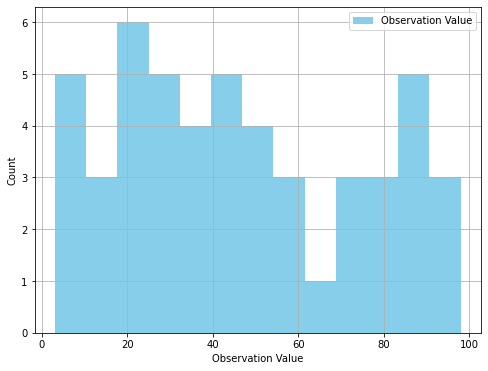

In [26]:
plt.figure(figsize=(8,6))
plt.hist(df['Observation Value'],bins=13,color='skyblue',label='Observation Value')
plt.xlabel('Observation Value')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

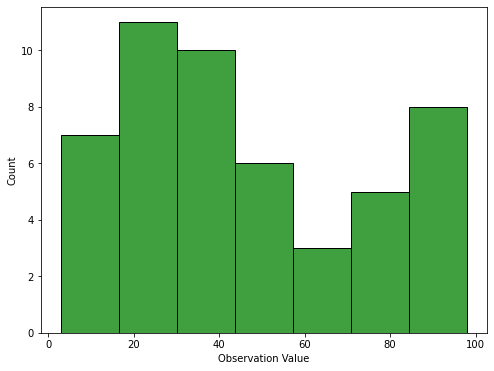

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(x='Observation Value',data=df,bins=7,kde=False,color='green')
plt.show()

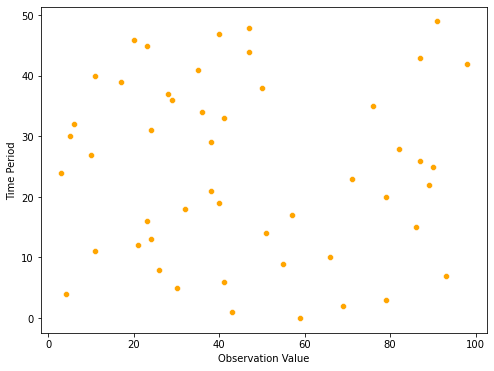

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Observation Value',y='Time Period',data=df,color='orange')
plt.show()

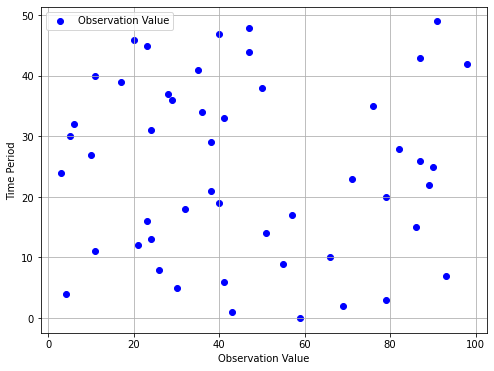

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df['Observation Value'],df['Time Period'],color='blue',label='Observation Value')
plt.xlabel('Observation Value')
plt.ylabel('Time Period')
plt.legend()
plt.grid(True)
plt.show()

## Q2:
### Suppose you have landed to a job and the first task you’ve assigned to prepare a report which includes the following:

<div class = "alert alert-block alert-info"
    <b>1. Player Count
        <br><code>- Total Number of Players</code></b>
</div>   

In [30]:
df = pd.read_csv('./Dataset/purchase_data.csv')
df.head(7)

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
5,5,Yalae81,22,Male,81,Dreamkiss,3.61
6,6,Itheria73,36,Male,169,"Interrogator, Blood Blade of the Queen",2.18


In [31]:
df.isnull().sum()

Purchase ID    0
SN             0
Age            0
Gender         0
Item ID        0
Item Name      0
Price          0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Purchase ID  780 non-null    int64  
 1   SN           780 non-null    object 
 2   Age          780 non-null    int64  
 3   Gender       780 non-null    object 
 4   Item ID      780 non-null    int64  
 5   Item Name    780 non-null    object 
 6   Price        780 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 42.8+ KB


In [33]:
df['SN'].count() # all the player count end-to-end

780

In [34]:
df['SN'].nunique() # unique count only

576

<div class = "alert alert-block alert-info"
    <b>2. Purchasing Analysis (Total)
        <br><code>- Number of Unique Items<br>- Average Purchase Price<br>- Total Number of Purchases<br>- Total Revenue</code></b>
</div>   

In [35]:
unique_itm = df['Item Name'].nunique()

In [36]:
avg_Pprice = df['Price'].mean()

In [37]:
P_count = df['Purchase ID'].count()

In [38]:
total_revenue = df['Price'].sum()

In [39]:
print(f"Number of Unique Items: {unique_itm}")
print(f"Average Purchase Price: Rs {avg_Pprice:.2f}")
print(f"Total Number of Purchases: {P_count}")
print(f"Total Revenue: Rs {total_revenue:.2f}")

Number of Unique Items: 179
Average Purchase Price: Rs 3.05
Total Number of Purchases: 780
Total Revenue: Rs 2379.77


<div class = "alert alert-block alert-info"
    <b>3. Gender Demographics
        <br><code>- Percentage and Count of Male Players<br>- Percentage and Count of Male Players<br>- Percentage and Count of Other / Non-Disclosed</code></b>
</div>   

In [40]:
df_gender = df['Gender'].value_counts().reset_index()
df_gender.columns = ['Gender','count']
df_gender

,Gender,count
0,Male,652
1,Female,113
2,Other / Non-Disclosed,15


In [41]:
for i in range(df_gender.shape[0]):
    print(f"Percentage of {df_gender['Gender'][i]}_Player is {(df_gender['count'][i]/df_gender['count'].sum())*100:.2f} and Count of {df_gender['Gender'][i]}_Player is {df_gender['count'][i]}\n")

Percentage of Male_Player is 83.59 and Count of Male_Player is 652

Percentage of Female_Player is 14.49 and Count of Female_Player is 113

Percentage of Other / Non-Disclosed_Player is 1.92 and Count of Other / Non-Disclosed_Player is 15



<div class = "alert alert-block alert-info"
    <b>4. Purchasing Analysis (Gender)<br>The below each broken by gender
        <br><code>- Purchase Count<br>- Average Purchase Price<br>- Total Purchase Value<br>- Average Purchase Total per Person by Gender</code></b>
</div>   

In [42]:
df_genGroup = df.groupby('Gender').agg(
    Purchase_count = ('Purchase ID','count'),
    Avg_Purchase_Price = ('Price','mean'),
    Total_purchase_Value = ('Price','sum')
).reset_index()

df_genGroup['Avg_Purchase_Price'] = np.round(df_genGroup['Avg_Purchase_Price'],3)

# df_genGroup

In [43]:
total_spent_per_person = df.groupby(['Gender', 'SN'])['Price'].sum().reset_index()

average_purchase_total = total_spent_per_person.groupby('Gender')['Price'].mean().reset_index()

average_purchase_total.columns =['Gender','Average Purchase Total per Person']

df_genGroup.merge(average_purchase_total,on='Gender')

,Gender,Purchase_count,Avg_Purchase_Price,Total_purchase_Value,Average Purchase Total per Person
0,Female,113,3.203,361.94,4.468395
1,Male,652,3.018,1967.64,4.065372
2,Other / Non-Disclosed,15,3.346,50.19,4.562727


<div class = "alert alert-block alert-info"
    <b>5. Age Demographics
    <br>The below each broken into bins of 4 years i.e. <10, 10-14, 15-19, etc.
       <br><code>- Purchase Count<br>- Average Purchase Price<br>- Total Purchase Value<br>- Average Purchase Total per Person by Age Group</code></b>
</div>   

In [44]:
df['Age'].unique()

array([20, 40, 24, 23, 22, 36, 35, 21, 30, 38, 29, 11,  7, 19, 37, 10,  8,
       18, 27, 33, 32, 25, 12, 34, 17, 15, 13, 26, 16, 28, 31, 39, 44, 41,
        9, 14, 42, 43, 45], dtype=int64)

In [45]:
bins = [0,10,14,18,22,26,30,34,38,42,46,50,54,58,62]
labels = ['10','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df_byAgeGroup = df.groupby('Age Group').agg(
    Purchase_count = ('Purchase ID','count'),
    Avg_Purchase_Price = ('Price','mean'),
    Total_purchase_Value = ('Price','sum')
).reset_index()

df_byAgeGroup['Avg_Purchase_Price'] = np.round(df_byAgeGroup['Avg_Purchase_Price'],3)

# df_byAgeGroup

In [46]:
total_spent_perPerson = df.groupby(['Age','Age Group'])['Price'].sum().reset_index()

average_purchase_total = total_spent_perPerson.groupby('Age Group')['Price'].mean().reset_index()

average_purchase_total.columns = ['Age Group','Average Purchase Total per Person']

average_purchase_total['Average Purchase Total per Person'] = np.round(average_purchase_total['Average Purchase Total per Person'],2)

df_byAgeGroup.merge(average_purchase_total,on='Age Group')

,Age Group,Purchase_count,Avg_Purchase_Price,Total_purchase_Value,Average Purchase Total per Person
0,10,23,3.353,77.13,1.98
1,10-14,26,2.918,75.87,1.95
2,15-19,89,3.007,267.60,6.86
3,20-24,210,3.082,647.26,16.60
4,25-29,263,3.045,800.90,20.54
5,30-34,42,2.645,111.10,2.85
6,35-39,64,2.998,191.87,4.92
7,40-44,35,3.209,112.33,2.88
8,45-49,23,3.510,80.72,2.07
9,50-54,5,2.998,14.99,0.38


<div class = "alert alert-block alert-info"
    <b>6. Top Spenders
    <br>Identify the the top 5 spenders in the game by total purchase value, then list (in a table):
       <br><code>- SN<br>- Purchase Count<br>- Average Purchase Price<br>- Total Purchase Value</code></b>
</div>   

In [47]:
df.head(2)

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Group
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,45-49


In [48]:
df_Top5_spender = df.groupby('SN').agg(
        purchase_count = ('Purchase ID','count'),
        Avg_P_Price = ('Price','mean'),
        Total_Purchase_value = ('Price','sum')
).reset_index()

df_Top5_spender['Avg_P_Price'] = np.round(df_Top5_spender['Avg_P_Price'],3)

df_Top5_spender

,SN,purchase_count,Avg_P_Price,Total_Purchase_value
0,Adairialis76,1,2.280,2.28
1,Adastirin33,1,4.480,4.48
2,Aeda94,1,4.910,4.91
3,Aela59,1,4.320,4.32
4,Aelaria33,1,1.790,1.79
...,...,...,...,...
571,Yathecal82,3,2.073,6.22
572,Yathedeu43,2,3.010,6.02
573,Yoishirrala98,1,4.580,4.58
574,Zhisrisu83,2,3.945,7.89


<div class = "alert alert-block alert-info"
    <b>7. Most Popular Items
    <br>Identify the 5 most popular items by purchase count, then list (in a table):
       <br><code>- Item ID<br>- Item Name<br>- Purchase Count<br>- Item Price<br>- Total Purchase Value</code></b>
</div>   

In [49]:
df_Top5_Popular_Items = df.groupby(['Item ID','Item Name']).agg(
        purchase_count = ('Purchase ID','count'),
        Item_Price = ('Price','mean'),
        Total_purchase_value = ('Price','sum')
)

df_Top5_Popular_Items = df_Top5_Popular_Items.sort_values(by='purchase_count',ascending=False).reset_index().head(5)
df_Top5_Popular_Items

,Item ID,Item Name,purchase_count,Item_Price,Total_purchase_value
0,178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
1,145,Fiery Glass Crusader,9,4.58,41.22
2,108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
3,82,Nirvana,9,4.90,44.10
4,19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


<div class = "alert alert-block alert-info"
    <b>8. Most Profitable Items
    <br>the 5 most profitable items by total purchase value, then list (in a table):
       <br><code>- Item ID<br>- Item Name<br>- Purchase Count<br>- Item Price<br>- Total Purchase Value</code></b>
</div>   

In [50]:
df_Top5_Profitable_Items = df.groupby(['Item ID','Item Name']).agg(
        purchase_count = ('Purchase ID','count'),
        Item_Price = ('Price','mean'),
        Total_purchase_value = ('Price','sum')
)

df_Top5_Profitable_Items = df_Top5_Profitable_Items.sort_values(by='Total_purchase_value',ascending=False).reset_index().head(5)
df_Top5_Profitable_Items

,Item ID,Item Name,purchase_count,Item_Price,Total_purchase_value
0,178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
1,82,Nirvana,9,4.90,44.10
2,145,Fiery Glass Crusader,9,4.58,41.22
3,92,Final Critic,8,4.88,39.04
4,103,Singed Scalpel,8,4.35,34.80


## Q4:
### Perform the pre-requisite viz. :
<code>
    -i. Data cleaning
    -ii. Inspection
    -iii. Manipulation if required
    -iv. Extracting meaningful visualization based on your understanding
    -v. Data consolidation if required</code>

### Read All_alpha_08 and 18 file and perform pre-requisite operation

In [51]:
df1 = pd.read_csv('./Dataset/all_alpha_08.csv')
df1.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no


In [52]:
df2 = pd.read_csv('./Dataset/all_alpha_18.csv')
df2.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402


<h1><b><center>----------------------------------A. Clean All_alpha_08 dataset----------------------------------</center></b></h1>

### 1. Data Cleaning

<div class = "alert alert-block alert-info"
        ><b><code>1. Identify Missing Values:</code></b>
</div>   

In [53]:
df1.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

<div class = "alert alert-block alert-info"
        ><b><code>2. Handle Missing Values:</code></b>
</div>   

In [54]:
def handle_missing_value(data):
    
    for i in data.columns:
        if data[i].dtypes == 'object':
            data[i].fillna(data[i].mode()[0],inplace=True)
            
        elif data[i].dtypes == 'float':
            data[i].fillna(data[i].mean(),inplace=True)
    
handle_missing_value(df1)

In [55]:
df1.isnull().sum()

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Sales Area              0
Stnd                    0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
FE Calc Appr            0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Unadj Cmb MPG           0
Greenhouse Gas Score    0
SmartWay                0
dtype: int64

<div class = "alert alert-block alert-info"
        ><b><code>3. Correct Data Types:</code></b>
</div>   

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2404 non-null   object 
 3   Trans                 2404 non-null   object 
 4   Drive                 2404 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2404 non-null   object 
 12  City MPG              2404 non-null   object 
 13  Hwy MPG               2404 non-null   object 
 14  Cmb MPG               2404 non-null   object 
 15  Unadj Cmb MPG        

In [57]:
df1.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no


In [58]:
df1['City MPG'].unique()

array(['15', '17', '16', '18', '19', '20', '10', '11', '12', '13', '21',
       '22', '14', '23', '9', '8', '11/14', '24', '9/12', '14/18',
       '13/18', '11/15', '12/16', '10/13', '9/14', '9/13', '13/19',
       '11/17', '34', '29', '10/14', '25', '26', '40', '27', '28', '35',
       '33', '48'], dtype=object)

In [59]:
lst_irrelevant = ['11/14','9/12','14/18','13/18','11/15','12/16','10/13','9/14','9/13','13/19','11/17','10/14']

df1 = df1[~df1['City MPG'].isin(lst_irrelevant)]
df1['City MPG'].unique()

array(['15', '17', '16', '18', '19', '20', '10', '11', '12', '13', '21',
       '22', '14', '23', '9', '8', '24', '34', '29', '25', '26', '40',
       '27', '28', '35', '33', '48'], dtype=object)

In [60]:
df1['Air Pollution Score'].unique()

array(['7', '6', '9.5', '3', '2', '1', '0', '3/3', '8', '9'], dtype=object)

In [61]:
df1 = df1[~(df1['Air Pollution Score'] == '3/3')]
df1['Air Pollution Score'].unique()

array(['7', '6', '9.5', '3', '2', '1', '0', '8', '9'], dtype=object)

In [62]:
df1['Air Pollution Score'] = df1['Air Pollution Score'].astype('float64')
df1['City MPG'] = df1['City MPG'].astype('int64')
df1['Hwy MPG'] = df1['Hwy MPG'].astype('int64')
df1['Cmb MPG'] = df1['Cmb MPG'].astype('int64')
df1['Greenhouse Gas Score'] = df1['Greenhouse Gas Score'].astype('int64')

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2332 non-null   object 
 1   Displ                 2332 non-null   float64
 2   Cyl                   2332 non-null   object 
 3   Trans                 2332 non-null   object 
 4   Drive                 2332 non-null   object 
 5   Fuel                  2332 non-null   object 
 6   Sales Area            2332 non-null   object 
 7   Stnd                  2332 non-null   object 
 8   Underhood ID          2332 non-null   object 
 9   Veh Class             2332 non-null   object 
 10  Air Pollution Score   2332 non-null   float64
 11  FE Calc Appr          2332 non-null   object 
 12  City MPG              2332 non-null   int64  
 13  Hwy MPG               2332 non-null   int64  
 14  Cmb MPG               2332 non-null   int64  
 15  Unadj Cmb MPG        

### 2. Inspection

<div class = "alert alert-block alert-info"
        ><b><code>1. Preview Data:</code></b>
</div>   

In [64]:
df1.head(4)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7.0,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6.0,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7.0,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6.0,Drv,17,22,19,24.1745,5,no


<div class = "alert alert-block alert-info"
        ><b><code>2. Descriptive Statistics: </code></b>
</div>   

In [65]:
df1.describe()

,Displ,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score
count,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000
mean,3.714451,6.029588,17.192110,23.844768,19.633362,24.215445,5.197256
std,1.335494,1.461791,3.832504,4.513947,4.000189,5.905897,1.818592
min,1.300000,0.000000,8.000000,13.000000,10.000000,10.018400,0.000000
25%,2.500000,6.000000,15.000000,20.000000,17.000000,19.862000,4.000000
50%,3.500000,6.000000,17.000000,24.000000,20.000000,23.916104,6.000000
75%,4.700000,7.000000,19.000000,27.000000,22.000000,27.612000,6.000000
max,8.400000,9.500000,48.000000,45.000000,46.000000,65.777800,10.000000


<div class = "alert alert-block alert-info"
        ><b><code>3. Unique Values:</code></b>
</div>   

In [66]:
list(df1['Sales Area'].unique())

['CA', 'FA', 'FC']

### 3. Manipulation

<div class = "alert alert-block alert-info"
        ><b><code>1. Filtering Data:</code></b>
</div>   

In [67]:
df1[df1['Cmb MPG']>40]

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
1145,HONDA Civic Hybrid,1.3,(4 cyl),Auto-AV,2WD,Gasoline,CA,S2,8HNXV01.3ZCP,small car,9.5,Drv,40,45,42,58.8362,10,yes
1146,HONDA Civic Hybrid,1.3,(4 cyl),Auto-AV,2WD,Gasoline,FA,B2,8HNXV01.3ZCP,small car,9.0,Drv,40,45,42,58.8362,10,yes
2187,TOYOTA Prius,1.5,(4 cyl),Auto-AV,2WD,Gasoline,CA,S2,8TYXV01.5HC3,midsize car,9.5,Drv,48,45,46,65.7778,10,yes
2188,TOYOTA Prius,1.5,(4 cyl),Auto-AV,2WD,Gasoline,FA,B3,8TYXV01.5HC3,midsize car,8.0,Drv,48,45,46,65.7778,10,yes


<div class = "alert alert-block alert-info"
        ><b><code>2. Creating New Columns:</code></b>
</div>   

In [68]:
df1['Avg_MPG'] = np.round((df1['City MPG']+df1['Hwy MPG']+df1['Cmb MPG'])/3,2)
df1.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay,Avg_MPG
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7.0,Drv,15,20,17,22.0527,4,no,17.33
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6.0,Drv,15,20,17,22.0527,4,no,17.33
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7.0,Drv,17,22,19,24.1745,5,no,19.33


<div class = "alert alert-block alert-info"
        ><b><code>3. Group By:</code></b>
</div>   

In [69]:
df_Gmodel = df1.groupby('Model')['City MPG'].sum().reset_index()
df_Gmodel

,Model,City MPG
0,ACURA MDX,30
1,ACURA RDX,34
2,ACURA RL,32
3,ACURA TL,106
4,ACURA TSX,78
...,...,...
424,VOLVO S80,124
425,VOLVO V50,246
426,VOLVO V70,32
427,VOLVO XC 70,30


### 4. Visualization

In [70]:
df1.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay,Avg_MPG
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7.0,Drv,15,20,17,22.0527,4,no,17.33
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6.0,Drv,15,20,17,22.0527,4,no,17.33


In [71]:
df1['Sales Area'].unique()

array(['CA', 'FA', 'FC'], dtype=object)

In [73]:
df_Gmodel = df1.groupby('Sales Area')['City MPG'].sum().reset_index()
df_Gmodel.columns =['Sales Area','City MPG']

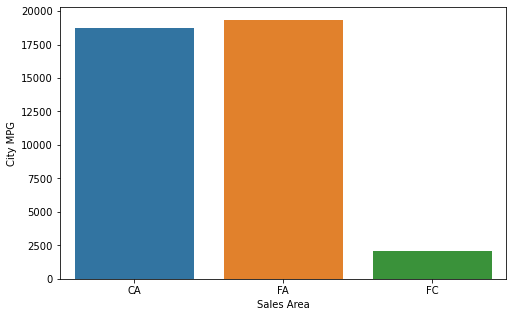

In [77]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sales Area',y='City MPG',data=df_Gmodel)
plt.show()

In [81]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Stnd',y=df['City MPG'].sum(),data=df1)
plt.show()

KeyError: 'City MPG'

<Figure size 576x360 with 0 Axes>